<h1>Tugas Individu - Data Preprocessing</h1>
<h3>Studi Independen - Data Science and Artificial Intelligence - Startup Campus</h3>

<br>

<table>
  <tr>
    <td><h6>ID</h6></td>
    <td><h6>:</h6></td>
    <td><h6>SC61914</h6></td>
  </tr>
  <tr>
    <td><h6>Nama</h6></td>
    <td><h6>:</h6></td>
    <td><h6>I Made Surya Adi Palguna</h6></td>
  </tr>
  <tr>
    <td><h6>NIM</h6></td>
    <td><h6>:</h6></td>
    <td><h6>2108561067</h6></td>
  </tr>
</table>

<br>

<h3>Program Studi Informatika - Fakultas Matematika dan Ilmu Pengetahuan Alam - Universitas Udayana 2024</h3>



<h6>Dataset</h6>

<ul>
  <li><a href="https://www.kaggle.com/competitions/home-data-for-ml-course/data">Sales/Marketing</a></li>
  <li><a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset">Health Case Study</a> (dataset yang digunakan)</li>
</ul>

In [ ]:
# Import Library
import pandas as pd
import numpy as np
from seaborn import heatmap as hm
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Ekstrak Dataset Zip
!wget "https://drive.google.com/uc?export=file&id=11F-2ZFC1IM7ejnRZwlgbRkJ6tOqJvaNU" -O /content/drive/MyDrive/heart.zip
!mv /content/drive/MyDrive/heart.zip /content/heart.zip
!unzip /content/heart.zip -d /content/heart/

--2024-04-16 03:09:11--  https://drive.google.com/uc?export=file&id=11F-2ZFC1IM7ejnRZwlgbRkJ6tOqJvaNU
Resolving drive.google.com (drive.google.com)... 74.125.143.101, 74.125.143.139, 74.125.143.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=11F-2ZFC1IM7ejnRZwlgbRkJ6tOqJvaNU&export=file [following]
--2024-04-16 03:09:12--  https://drive.usercontent.google.com/download?id=11F-2ZFC1IM7ejnRZwlgbRkJ6tOqJvaNU&export=file
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6325 (6.2K) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/heart.zip’

/content/drive/MyDr 100%[===================>]   6.18K  --.

In [ ]:
# Ambil Dataset
df = pd.read_csv("/content/heart/heart.csv")
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Rewrite Data Kategorikal
df["sex"] = pd.Series(map(lambda d: "male" if d == 1 else "female" if d == 0 else np.nan, list(df["sex"])))
df["cp"] = pd.Series(map(lambda d: str(d) if d is not np.nan else None, list(df["cp"])))
df["fbs"] = pd.Series(map(lambda d: "true" if d == 1 else "false" if d == 0 else np.nan, list(df["fbs"])))
df["restecg"] = pd.Series(map(lambda d: str(d) if d is not np.nan else None, list(df["cp"])))
df["exang"] = pd.Series(map(lambda d: "yes" if d == 1 else "no" if d == 0 else np.nan, list(df["exang"])))
df["slope"] = pd.Series(map(lambda d: str(d) if d is not np.nan else None, list(df["slope"])))
df["ca"] = pd.Series(map(lambda d: str(d) if d < 3 else np.nan, list(df["ca"])))
df["thal"] = pd.Series(map(lambda d: "reversable_defect" if d == 3 else "fixed_defect" if d == 2 else "normal" if d == 1 else np.nan, list(df["thal"])))
df["target"] = pd.Series(map(lambda d: "disease" if d == 1 else "no_disease" if d == 0 else np.nan, list(df["target"])))

In [ ]:
# Cek Data
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,false,0,168,no,1.0,2,2,reversable_defect,no_disease
1,53,male,0,140,203,true,0,155,yes,3.1,0,0,reversable_defect,no_disease
2,70,male,0,145,174,false,0,125,yes,2.6,0,0,reversable_defect,no_disease
3,61,male,0,148,203,false,0,161,no,0.0,2,1,reversable_defect,no_disease
4,62,female,0,138,294,true,0,106,no,1.9,1,NaN,fixed_defect,no_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,false,1,164,yes,0.0,2,0,fixed_defect,disease
1021,60,male,0,125,258,false,0,141,yes,2.8,1,1,reversable_defect,no_disease
1022,47,male,0,110,275,false,0,118,yes,1.0,1,1,fixed_defect,no_disease
1023,50,female,0,110,254,false,0,159,no,0.0,2,0,fixed_defect,disease


In [ ]:
# Cek Info dan Statistik
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        938 non-null    object 
 12  thal      1018 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 112.2+ KB


None

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


### 1. Data Preparation

<p>Peserta dapat memilih dataset yang telah disediakan. Siapkan data berdasarkan langkah berikut:<p>

<ul>
  <li>Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.</li>
  <li>Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.</li>
  <li>Outlier: Memeriksa outlier dan menangani outlier jika ada.</li>
  <li>Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.</li>
  <li>Feature encoding: Melakukan feature encoding jika diperlukan.</li>
</ul>

###### Missing Value

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          87
thal         7
target       0
dtype: int64

<Axes: >

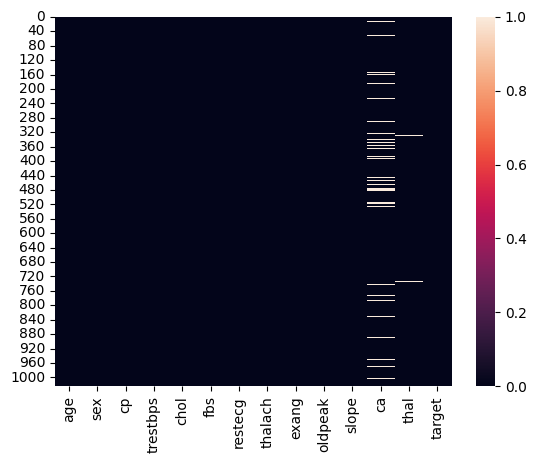

In [ ]:
# Cek Missing Value
display(df.isnull().sum())
hm(df.isnull())

In [ ]:
# Fill Missing Value
df = df.fillna(method="ffill")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

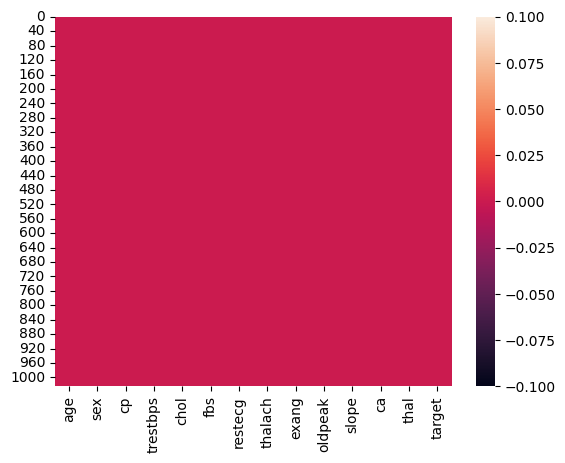

In [ ]:
# Cek Missing Value
display(df.isnull().sum())
hm(df.isnull())

In [ ]:
# Cek Info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 112.2+ KB


None

###### Duplicate Value

In [ ]:
# Cek Duplicate Value
display(df.duplicated())
print("Duplicate: {}".format(df.duplicated().sum()))

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

Duplicate: 701


In [ ]:
# Drop Duplicate Value
df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
# Cek Duplicate Value
display(df.duplicated())
print("Duplicate: {}".format(df.duplicated().sum()))

0      False
1      False
2      False
3      False
4      False
       ...  
319    False
320    False
321    False
322    False
323    False
Length: 324, dtype: bool

Duplicate: 0


###### Outlier

In [ ]:
# Function Outlier
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile2 = dataframe[col_name].quantile(q3)
  iqr = quartile2 - quartile1
  up_limit = quartile2 + 1.5 * iqr
  low_limit = quartile1 - 1.5 * iqr
  return low_limit, up_limit

def check_outlier(dataframe, col_name): # Cek Outlier
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

def winsorize_outliers(dataframe, col_name): # Clear Outlier
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe[col_name] = np.where(dataframe[col_name] < low_limit, low_limit, dataframe[col_name])
  dataframe[col_name] = np.where(dataframe[col_name] > up_limit, up_limit, dataframe[col_name])

In [ ]:
# Cek Outlier
for c in df.select_dtypes(exclude="object").columns:
  print("{}: {}".format(c, check_outlier(df, c)))

age: False
trestbps: False
chol: False
thalach: False
oldpeak: False


In [ ]:
# Clear Outlier
for c in df.select_dtypes(exclude="object").columns:
  winsorize_outliers(df, c)

In [ ]:
# Cek Outlier
for c in df.select_dtypes(exclude="object").columns:
  print("{}: {}".format(c, check_outlier(df, c)))

age: False
trestbps: False
chol: False
thalach: False
oldpeak: False


###### Imbalance Data

In [ ]:
# Cek Info dan Statistik
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       324 non-null    float64
 1   sex       324 non-null    object 
 2   cp        324 non-null    object 
 3   trestbps  324 non-null    float64
 4   chol      324 non-null    float64
 5   fbs       324 non-null    object 
 6   restecg   324 non-null    object 
 7   thalach   324 non-null    float64
 8   exang     324 non-null    object 
 9   oldpeak   324 non-null    float64
 10  slope     324 non-null    object 
 11  ca        324 non-null    object 
 12  thal      324 non-null    object 
 13  target    324 non-null    object 
dtypes: float64(5), object(9)
memory usage: 35.6+ KB


None

,age,trestbps,chol,thalach,oldpeak
count,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.524691,131.901235,247.814815,148.790123,1.075309
std,9.006156,17.416838,53.044373,22.943714,1.191407
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.750000,132.000000,0.000000
50%,55.500000,130.000000,242.500000,152.000000,0.800000
75%,61.000000,140.000000,278.750000,165.000000,1.800000
max,77.000000,200.000000,564.000000,202.000000,6.200000


###### Feature Encoding

In [ ]:
# Encoding Data Kategorikal
encode_df = pd.get_dummies(df[df.select_dtypes(include="object").columns])

In [ ]:
# Cek Data
display(encode_df)

,sex_female,sex_male,cp_0,cp_1,cp_2,cp_3,fbs_false,fbs_true,restecg_0,restecg_1,...,slope_1,slope_2,ca_0,ca_1,ca_2,thal_fixed_defect,thal_normal,thal_reversable_defect,target_disease,target_no_disease
0,False,True,True,False,False,False,True,False,True,False,...,False,True,False,False,True,False,False,True,False,True
1,False,True,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
2,False,True,True,False,False,False,True,False,True,False,...,False,False,True,False,False,False,False,True,False,True
3,False,True,True,False,False,False,True,False,True,False,...,False,True,False,True,False,False,False,True,False,True
4,True,False,True,False,False,False,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,False,True,False,False,False,True,True,False,False,False,...,False,True,True,False,False,True,False,False,False,True
320,False,True,True,False,False,False,True,False,True,False,...,True,False,False,True,False,False,False,True,False,True
321,True,False,True,False,False,False,True,False,True,False,...,True,False,False,False,True,False,False,True,False,True
322,False,True,True,False,False,False,True,False,True,False,...,True,False,False,True,False,False,False,True,False,True


### 2. Exploratory Data Analysis (EDA)

<p>Menggunakan dataset yang sama, Peserta diminta untuk:</p>

<ul>
  <li>Mengelaborasi features dan tipe data (nominal, ordinal, numerical)</li>
  <li>Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus</li>
  <li>Menemukan dan mendeskripsikan statistical five summaries</li>
  <li>Mendeskripsikan distribusi data</li>
</ul>

###### Elaborasi Features dan Tipe Data

In [ ]:
# Cek Data, Info, dan Statistik
display(df)
display(df.info())
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,male,0,125.0,212.0,false,0,168.0,no,1.0,2,2,reversable_defect,no_disease
1,53.0,male,0,140.0,203.0,true,0,155.0,yes,3.1,0,0,reversable_defect,no_disease
2,70.0,male,0,145.0,174.0,false,0,125.0,yes,2.6,0,0,reversable_defect,no_disease
3,61.0,male,0,148.0,203.0,false,0,161.0,no,0.0,2,1,reversable_defect,no_disease
4,62.0,female,0,138.0,294.0,true,0,106.0,no,1.9,1,1,fixed_defect,no_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,59.0,male,3,160.0,273.0,false,3,125.0,no,0.0,2,0,fixed_defect,no_disease
320,54.0,male,0,120.0,188.0,false,0,113.0,no,1.4,1,1,reversable_defect,no_disease
321,63.0,female,0,150.0,407.0,false,0,154.0,no,4.0,1,2,reversable_defect,no_disease
322,45.0,male,0,142.0,309.0,false,0,147.0,yes,0.0,1,1,reversable_defect,no_disease


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       324 non-null    float64
 1   sex       324 non-null    object 
 2   cp        324 non-null    object 
 3   trestbps  324 non-null    float64
 4   chol      324 non-null    float64
 5   fbs       324 non-null    object 
 6   restecg   324 non-null    object 
 7   thalach   324 non-null    float64
 8   exang     324 non-null    object 
 9   oldpeak   324 non-null    float64
 10  slope     324 non-null    object 
 11  ca        324 non-null    object 
 12  thal      324 non-null    object 
 13  target    324 non-null    object 
dtypes: float64(5), object(9)
memory usage: 35.6+ KB


None

,age,trestbps,chol,thalach,oldpeak
count,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.524691,131.901235,247.814815,148.790123,1.075309
std,9.006156,17.416838,53.044373,22.943714,1.191407
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.750000,132.000000,0.000000
50%,55.500000,130.000000,242.500000,152.000000,0.800000
75%,61.000000,140.000000,278.750000,165.000000,1.800000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
# Tipe Data Nominal
nominal_col = ["sex", "fbs", "exang", "target"]
nominal_df = df[nominal_col]
display(nominal_df)

,sex,fbs,exang,target
0,male,false,no,no_disease
1,male,true,yes,no_disease
2,male,false,yes,no_disease
3,male,false,no,no_disease
4,female,true,no,no_disease
...,...,...,...,...
319,male,false,no,no_disease
320,male,false,no,no_disease
321,female,false,no,no_disease
322,male,false,yes,no_disease


In [ ]:
# Tipe Data Ordinal
ordinal_col = ["cp", "restecg", "slope", "ca", "thal"]
ordinal_df = df[ordinal_col]
display(ordinal_df)

,cp,restecg,slope,ca,thal
0,0,0,2,2,reversable_defect
1,0,0,0,0,reversable_defect
2,0,0,0,0,reversable_defect
3,0,0,2,1,reversable_defect
4,0,0,1,1,fixed_defect
...,...,...,...,...,...
319,3,3,2,0,fixed_defect
320,0,0,1,1,reversable_defect
321,0,0,1,2,reversable_defect
322,0,0,1,1,reversable_defect


In [ ]:
# Tipe Data Numerical
numerical_col = ["age", "trestbps", "chol", "thalach", "oldpeak"]
numerical_df = df[numerical_col]
display(numerical_df)

,age,trestbps,chol,thalach,oldpeak
0,52.0,125.0,212.0,168.0,1.0
1,53.0,140.0,203.0,155.0,3.1
2,70.0,145.0,174.0,125.0,2.6
3,61.0,148.0,203.0,161.0,0.0
4,62.0,138.0,294.0,106.0,1.9
...,...,...,...,...,...
319,59.0,160.0,273.0,125.0,0.0
320,54.0,120.0,188.0,113.0,1.4
321,63.0,150.0,407.0,154.0,4.0
322,45.0,142.0,309.0,147.0,0.0


###### Mean, Median, dan Modus

In [ ]:
# Mean
display(df.select_dtypes(exclude="object").mean())

age          54.524691
trestbps    131.901235
chol        247.814815
thalach     148.790123
oldpeak       1.075309
dtype: float64

In [ ]:
# Median
display(df.select_dtypes(exclude="object").median())

age          55.5
trestbps    130.0
chol        242.5
thalach     152.0
oldpeak       0.8
dtype: float64

In [ ]:
# Modus
display(df.select_dtypes(exclude="object").mode())

,age,trestbps,chol,thalach,oldpeak
0,58.0,120.0,204.0,162.0,0.0
1,NaN,130.0,NaN,NaN,NaN


###### Statistical Five Summaries

In [ ]:
# Cek Info dan Statistik
display(df.describe())

,age,trestbps,chol,thalach,oldpeak
count,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.524691,131.901235,247.814815,148.790123,1.075309
std,9.006156,17.416838,53.044373,22.943714,1.191407
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.750000,132.000000,0.000000
50%,55.500000,130.000000,242.500000,152.000000,0.800000
75%,61.000000,140.000000,278.750000,165.000000,1.800000
max,77.000000,200.000000,564.000000,202.000000,6.200000


###### Distribusi Data

In [ ]:
# Function Visualisasi
def plot_hist(data):
  fig, ax = plt.subplots(figsize=(6, 3))
  sns.histplot(data, ax=ax, kde=True)

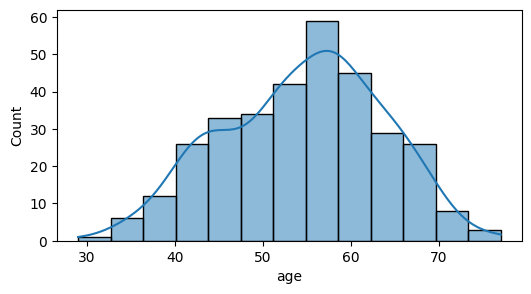

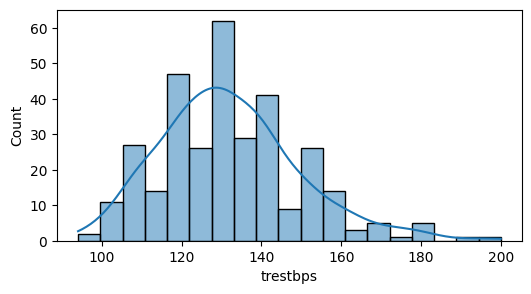

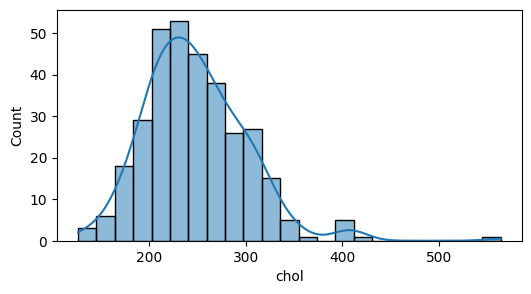

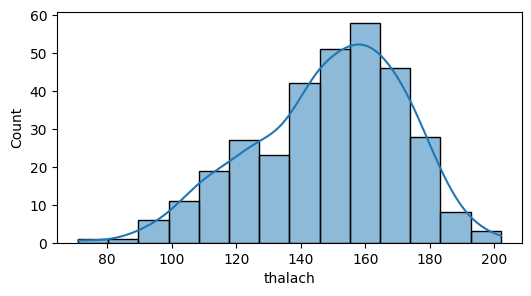

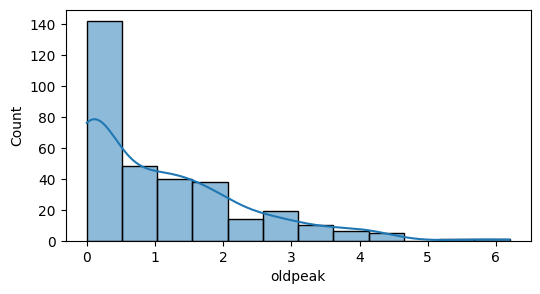

In [ ]:
# Hasil Distribusi Data
for d in df.select_dtypes(exclude="object").columns:
  plot_hist(df[d])

In [ ]:
# Jenis Distribusi Data
for d in df.select_dtypes(exclude="object").columns:
  print("Grafic '{}': {}".format(d, "positive skew" if df[d].skew() > 0 else "negative skew" if df[d].skew() < 0 else "symmetrical distribution"))

Grafic 'age': negative skew
Grafic 'trestbps': positive skew
Grafic 'chol': positive skew
Grafic 'thalach': negative skew
Grafic 'oldpeak': positive skew


### Feature Engineering

<p>Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membantu bisnis ecommerce dalam menghadapi tantangan bisnis yang ada.</p>
<p>Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.</p>

In [ ]:
# Cek Data
display(df)
display(encode_df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,male,0,125.0,212.0,false,0,168.0,no,1.0,2,2,reversable_defect,no_disease
1,53.0,male,0,140.0,203.0,true,0,155.0,yes,3.1,0,0,reversable_defect,no_disease
2,70.0,male,0,145.0,174.0,false,0,125.0,yes,2.6,0,0,reversable_defect,no_disease
3,61.0,male,0,148.0,203.0,false,0,161.0,no,0.0,2,1,reversable_defect,no_disease
4,62.0,female,0,138.0,294.0,true,0,106.0,no,1.9,1,1,fixed_defect,no_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,59.0,male,3,160.0,273.0,false,3,125.0,no,0.0,2,0,fixed_defect,no_disease
320,54.0,male,0,120.0,188.0,false,0,113.0,no,1.4,1,1,reversable_defect,no_disease
321,63.0,female,0,150.0,407.0,false,0,154.0,no,4.0,1,2,reversable_defect,no_disease
322,45.0,male,0,142.0,309.0,false,0,147.0,yes,0.0,1,1,reversable_defect,no_disease


,sex_female,sex_male,cp_0,cp_1,cp_2,cp_3,fbs_false,fbs_true,restecg_0,restecg_1,...,slope_1,slope_2,ca_0,ca_1,ca_2,thal_fixed_defect,thal_normal,thal_reversable_defect,target_disease,target_no_disease
0,False,True,True,False,False,False,True,False,True,False,...,False,True,False,False,True,False,False,True,False,True
1,False,True,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
2,False,True,True,False,False,False,True,False,True,False,...,False,False,True,False,False,False,False,True,False,True
3,False,True,True,False,False,False,True,False,True,False,...,False,True,False,True,False,False,False,True,False,True
4,True,False,True,False,False,False,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,False,True,False,False,False,True,True,False,False,False,...,False,True,True,False,False,True,False,False,False,True
320,False,True,True,False,False,False,True,False,True,False,...,True,False,False,True,False,False,False,True,False,True
321,True,False,True,False,False,False,True,False,True,False,...,True,False,False,False,True,False,False,True,False,True
322,False,True,True,False,False,False,True,False,True,False,...,True,False,False,True,False,False,False,True,False,True


In [ ]:
# Buat Data Feature
feature_df = pd.DataFrame()

In [ ]:
# Grouping Order By target
grouped_target_df = df.groupby("target")

In [ ]:
# 1. Average age
# Untuk mengetahui rata-rata age yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["average_age"] = grouped_target_df["age"].transform("mean").round(2)
display(feature_df)

,average_age
0,56.73
1,56.73
2,56.73
3,56.73
4,56.73
...,...
319,56.73
320,56.73
321,56.73
322,56.73


In [ ]:
# 2. Average trestbps
# Untuk mengetahui rata-rata trestbps yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["average_trestbps"] = grouped_target_df["trestbps"].transform("mean").round(2)
display(feature_df)

,average_age,average_trestbps
0,56.73,134.88
1,56.73,134.88
2,56.73,134.88
3,56.73,134.88
4,56.73,134.88
...,...,...
319,56.73,134.88
320,56.73,134.88
321,56.73,134.88
322,56.73,134.88


In [ ]:
# 3. Average chol
# Untuk mengetahui rata-rata chol yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["average_chol"] = grouped_target_df["chol"].transform("mean").round(2)
display(feature_df)

,average_age,average_trestbps,average_chol
0,56.73,134.88,254.45
1,56.73,134.88,254.45
2,56.73,134.88,254.45
3,56.73,134.88,254.45
4,56.73,134.88,254.45
...,...,...,...
319,56.73,134.88,254.45
320,56.73,134.88,254.45
321,56.73,134.88,254.45
322,56.73,134.88,254.45


In [ ]:
# 4. Average thalach
# Untuk mengetahui rata-rata thalach yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["average_thalach"] = grouped_target_df["thalach"].transform("mean").round(2)
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach
0,56.73,134.88,254.45,138.40
1,56.73,134.88,254.45,138.40
2,56.73,134.88,254.45,138.40
3,56.73,134.88,254.45,138.40
4,56.73,134.88,254.45,138.40
...,...,...,...,...
319,56.73,134.88,254.45,138.40
320,56.73,134.88,254.45,138.40
321,56.73,134.88,254.45,138.40
322,56.73,134.88,254.45,138.40


In [ ]:
# 5. Average oldpeak
# Untuk mengetahui rata-rata oldpeak yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["average_oldpeak"] = grouped_target_df["oldpeak"].transform("mean").round(2)
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach,average_oldpeak
0,56.73,134.88,254.45,138.40,1.63
1,56.73,134.88,254.45,138.40,1.63
2,56.73,134.88,254.45,138.40,1.63
3,56.73,134.88,254.45,138.40,1.63
4,56.73,134.88,254.45,138.40,1.63
...,...,...,...,...,...
319,56.73,134.88,254.45,138.40,1.63
320,56.73,134.88,254.45,138.40,1.63
321,56.73,134.88,254.45,138.40,1.63
322,56.73,134.88,254.45,138.40,1.63


In [ ]:
# 6. Dominan sex Per target
# Untuk mengetahui sex terbanyak yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["dominan_sex"] = grouped_target_df["sex"].transform(lambda d: d.mode()[0])
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach,average_oldpeak,dominan_sex
0,56.73,134.88,254.45,138.40,1.63,male
1,56.73,134.88,254.45,138.40,1.63,male
2,56.73,134.88,254.45,138.40,1.63,male
3,56.73,134.88,254.45,138.40,1.63,male
4,56.73,134.88,254.45,138.40,1.63,male
...,...,...,...,...,...,...
319,56.73,134.88,254.45,138.40,1.63,male
320,56.73,134.88,254.45,138.40,1.63,male
321,56.73,134.88,254.45,138.40,1.63,male
322,56.73,134.88,254.45,138.40,1.63,male


In [ ]:
# 7. Dominan cp Per target
# Untuk mengetahui cp terbanyak yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["dominan_cp"] = grouped_target_df["cp"].transform(lambda d: d.mode()[0])
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach,average_oldpeak,dominan_sex,dominan_cp
0,56.73,134.88,254.45,138.40,1.63,male,0
1,56.73,134.88,254.45,138.40,1.63,male,0
2,56.73,134.88,254.45,138.40,1.63,male,0
3,56.73,134.88,254.45,138.40,1.63,male,0
4,56.73,134.88,254.45,138.40,1.63,male,0
...,...,...,...,...,...,...,...
319,56.73,134.88,254.45,138.40,1.63,male,0
320,56.73,134.88,254.45,138.40,1.63,male,0
321,56.73,134.88,254.45,138.40,1.63,male,0
322,56.73,134.88,254.45,138.40,1.63,male,0


In [ ]:
# 8. Dominan fbs Per target
# Untuk mengetahui fbs terbanyak yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["dominan_fbs"] = grouped_target_df["fbs"].transform(lambda d: d.mode()[0])
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach,average_oldpeak,dominan_sex,dominan_cp,dominan_fbs
0,56.73,134.88,254.45,138.40,1.63,male,0,false
1,56.73,134.88,254.45,138.40,1.63,male,0,false
2,56.73,134.88,254.45,138.40,1.63,male,0,false
3,56.73,134.88,254.45,138.40,1.63,male,0,false
4,56.73,134.88,254.45,138.40,1.63,male,0,false
...,...,...,...,...,...,...,...,...
319,56.73,134.88,254.45,138.40,1.63,male,0,false
320,56.73,134.88,254.45,138.40,1.63,male,0,false
321,56.73,134.88,254.45,138.40,1.63,male,0,false
322,56.73,134.88,254.45,138.40,1.63,male,0,false


In [ ]:
# 9. Dominan restecg Per target
# Untuk mengetahui restecg terbanyak yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["dominan_restecg"] = grouped_target_df["restecg"].transform(lambda d: d.mode()[0])
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach,average_oldpeak,dominan_sex,dominan_cp,dominan_fbs,dominan_restecg
0,56.73,134.88,254.45,138.40,1.63,male,0,false,0
1,56.73,134.88,254.45,138.40,1.63,male,0,false,0
2,56.73,134.88,254.45,138.40,1.63,male,0,false,0
3,56.73,134.88,254.45,138.40,1.63,male,0,false,0
4,56.73,134.88,254.45,138.40,1.63,male,0,false,0
...,...,...,...,...,...,...,...,...,...
319,56.73,134.88,254.45,138.40,1.63,male,0,false,0
320,56.73,134.88,254.45,138.40,1.63,male,0,false,0
321,56.73,134.88,254.45,138.40,1.63,male,0,false,0
322,56.73,134.88,254.45,138.40,1.63,male,0,false,0


In [ ]:
# 10. Dominan exang Per target
# Untuk mengetahui exang terbanyak yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["dominan_exang"] = grouped_target_df["exang"].transform(lambda d: d.mode()[0])
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach,average_oldpeak,dominan_sex,dominan_cp,dominan_fbs,dominan_restecg,dominan_exang
0,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes
1,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes
2,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes
3,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes
4,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes
...,...,...,...,...,...,...,...,...,...,...
319,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes
320,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes
321,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes
322,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes


In [ ]:
# 11. Dominan slope Per target
# Untuk mengetahui slope terbanyak yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["dominan_slope"] = grouped_target_df["slope"].transform(lambda d: d.mode()[0])
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach,average_oldpeak,dominan_sex,dominan_cp,dominan_fbs,dominan_restecg,dominan_exang,dominan_slope
0,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1
1,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1
2,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1
3,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1
4,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1
...,...,...,...,...,...,...,...,...,...,...,...
319,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1
320,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1
321,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1
322,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1


In [ ]:
# 12. Dominan ca Per target
# Untuk mengetahui ca terbanyak yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["dominan_ca"] = grouped_target_df["ca"].transform(lambda d: d.mode()[0])
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach,average_oldpeak,dominan_sex,dominan_cp,dominan_fbs,dominan_restecg,dominan_exang,dominan_slope,dominan_ca
0,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0
1,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0
2,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0
3,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0
4,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0
320,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0
321,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0
322,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0


In [ ]:
# 13. Dominan thal Per target
# Untuk mengetahui thal terbanyak yang terdiagnosis penyakit jantung dengan yang tidak terdiagnosis penyakit jantung
feature_df["dominan_thal"] = grouped_target_df["thal"].transform(lambda d: d.mode()[0])
display(feature_df)

,average_age,average_trestbps,average_chol,average_thalach,average_oldpeak,dominan_sex,dominan_cp,dominan_fbs,dominan_restecg,dominan_exang,dominan_slope,dominan_ca,dominan_thal
0,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0,reversable_defect
1,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0,reversable_defect
2,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0,reversable_defect
3,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0,reversable_defect
4,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0,reversable_defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0,reversable_defect
320,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0,reversable_defect
321,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0,reversable_defect
322,56.73,134.88,254.45,138.40,1.63,male,0,false,0,yes,1,0,reversable_defect


In [ ]:
# Buat New Data
new_df = df.join(feature_df, how="inner").join(encode_df, how="inner")
display(new_df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1,slope_2,ca_0,ca_1,ca_2,thal_fixed_defect,thal_normal,thal_reversable_defect,target_disease,target_no_disease
0,52.0,male,0,125.0,212.0,false,0,168.0,no,1.0,...,False,True,False,False,True,False,False,True,False,True
1,53.0,male,0,140.0,203.0,true,0,155.0,yes,3.1,...,False,False,True,False,False,False,False,True,False,True
2,70.0,male,0,145.0,174.0,false,0,125.0,yes,2.6,...,False,False,True,False,False,False,False,True,False,True
3,61.0,male,0,148.0,203.0,false,0,161.0,no,0.0,...,False,True,False,True,False,False,False,True,False,True
4,62.0,female,0,138.0,294.0,true,0,106.0,no,1.9,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,59.0,male,3,160.0,273.0,false,3,125.0,no,0.0,...,False,True,True,False,False,True,False,False,False,True
320,54.0,male,0,120.0,188.0,false,0,113.0,no,1.4,...,True,False,False,True,False,False,False,True,False,True
321,63.0,female,0,150.0,407.0,false,0,154.0,no,4.0,...,True,False,False,False,True,False,False,True,False,True
322,45.0,male,0,142.0,309.0,false,0,147.0,yes,0.0,...,True,False,False,True,False,False,False,True,False,True


In [ ]:
new_df.to_csv("/content/heart/new_data_heart.csv", index=False)